# Code de openai pour le calcul de Monte Carlo sur un dataframe (+ reflexion avec YOannnn)

## Dataframe test

In [165]:
import numpy as np
import pandas as pd
from utilities.data.lvm import lvm_to_df
import CoolProp.CoolProp as CP

df = lvm_to_df(r'C:\Users\yberton\OneDrive - INSA Lyon\Expérimental\Acquisition\Etalonnage\E_in_imm\17_03_2025.lvm')


In [166]:
df['T'] = df['202 - E_in_imm [°C]']
df['P'] = df['118 - P_TS_in [bars]'] 

Incertitudes connues (dépendantes de l'index (temps))

In [167]:
df["u_T"] = [8.8E-2 for i in range(len(df))]
df["u_P"] = [6E-3 for i in range(len(df))]

## Paramètres Monte Carlo

In [168]:
N_mc = 1_000
rng = np.random.default_rng(seed=42)


## Tirage Monte Carlo (Vectorisés)

In [173]:
N = len(df.columns)

T_mc = rng.normal(
    loc=df["T"].values,
    scale=df["u_T"].values,
    size=(N_mc, N)
)

P_mc = rng.normal(
    loc=df["P"].values,
    scale=df["u_P"].values,
    size=(N_mc, N)
)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1000, 47) and arg 1 with shape (1733,).

Calcul Monte Carlo de la grandeur

In [172]:
len(T_mc[0])

1733

In [ ]:
fun = lambda T,P : CP.PropsSI('H','T',T+273.15,'P', P*1E5, 'R245fa')
h_mc = [fun(T, P) for T,P in zip(T_mc,P_mc) ]

## Estimation valeur + incertitude

In [ ]:
df["H"] = h_mc
df["u_H"] = h_mc.std(axis=1, ddof=1)


ValueError: Length of values (1000) does not match length of index (1733)

## Résultat final

In [ ]:
print(f'df["u_H"] = {df["u_H"]}')

df["u_H"] = 2025-03-17 11:12:00.912390    32395.593783
2025-03-17 11:12:10.912390    32395.593783
2025-03-17 11:12:20.912390    32395.593783
2025-03-17 11:12:30.912390    32395.593783
2025-03-17 11:12:40.912390    32395.593783
                                  ...     
2025-03-17 16:00:00.912390    32395.593783
2025-03-17 16:00:10.912390    32395.593783
2025-03-17 16:00:20.912390    32395.593783
2025-03-17 16:00:30.912390    32395.593783
2025-03-17 16:00:40.912390    32395.593783
Name: u_H, Length: 1733, dtype: float64


In [ ]:
print(f'df["H"] = {df["H"]}')

df["H"] = 2025-03-17 11:12:00.912390    420298.346711
2025-03-17 11:12:10.912390    420292.329813
2025-03-17 11:12:20.912390    420316.568822
2025-03-17 11:12:30.912390    419520.130080
2025-03-17 11:12:40.912390    418966.309292
                                  ...      
2025-03-17 16:00:00.912390    458513.137469
2025-03-17 16:00:10.912390    458257.901896
2025-03-17 16:00:20.912390    457854.433808
2025-03-17 16:00:30.912390    457625.133505
2025-03-17 16:00:40.912390    457203.932476
Name: H, Length: 1733, dtype: float64


In [ ]:
df['u_H']/df["H"]*100

2025-03-17 11:12:00.912390    7.707761
2025-03-17 11:12:10.912390    7.707872
2025-03-17 11:12:20.912390    7.707427
2025-03-17 11:12:30.912390    7.722059
2025-03-17 11:12:40.912390    7.732267
                                ...   
2025-03-17 16:00:00.912390    7.065358
2025-03-17 16:00:10.912390    7.069293
2025-03-17 16:00:20.912390    7.075523
2025-03-17 16:00:30.912390    7.079068
2025-03-17 16:00:40.912390    7.085589
Length: 1733, dtype: float64

<Axes: >

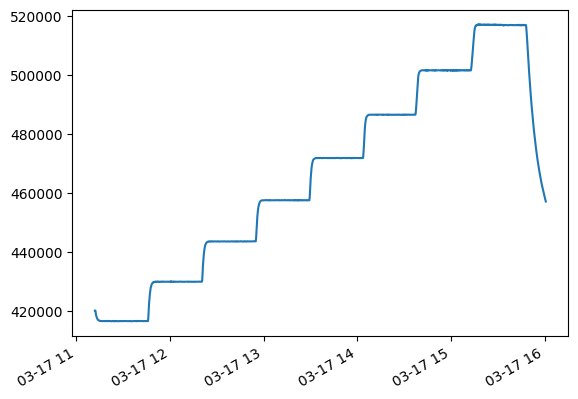

In [ ]:
df['H'].plot()